# Proje Tanımı: Balık Segmentasyonu ve Sınıflandırması için Veri Seti

Bu proje, İzmir Ekonomi Üniversitesi tarafından gerçekleştirilen bir iş birliği ile toplanan dokuz farklı deniz ürünü türünü içeren büyük ölçekli bir veri setini kapsamaktadır. Veri seti, çipura, levrek, kırmızı levrek, mercan, hamsi, karadeniz istavriti, çizgili mercan, alabalık ve karides türlerini içermektedir.

## Veri Seti Detayları:
- **Toplam Görüntü Sayısı:** Her tür için 2000 görüntü (1000 artırılmış RGB görüntü ve 1000 zemin gerçeklik etiketi).
- **Dizin Yapısı:** "Fish_Dataset" altında, dosya adları "00000.png" ile "01000.png" arasında sıralanmıştır.
- **Kamera Modelleri:** Kodak Easyshare Z650 ve Samsung ST60 kullanılmıştır.

## Proje Adımları

### Veri Ön İşleme:
- Pandas ve Matplotlib kütüphaneleri aracılığıyla veri seti düzenlenecek.
- Veri analizi gerçekleştirilecektir.

### Model Oluşturma:
- Yapay Sinir Ağı (ANN) mimarisi kullanılarak bir model geliştirilecektir.
- Modelin performansı, doğruluk ve kayıp fonksiyonu gibi metriklerle değerlendirilecektir.

### Performans Analizi:
- Kayıp fonksiyonu grafiği, karmaşıklık matrisleri (confusion matrix) ve sınıflandırma raporu (classification report) gibi araçlarla detaylı bir analiz yapılacaktır.

### Hiperparametre Optimizasyonu:
- Son aşamada, hiperparametre optimizasyonu ile modelin performansı artırılacaktır.

### Sonuçların Değerlendirilmesi:
- Elde edilen sonuçlar, tarım ve denizcilik sektörlerinde otomatik tanımlama sistemlerine katkıda bulunacaktır.

Bu proje, deniz ürünleri segmentasyonu ve sınıflandırması üzerine çalışan araştırmacılar ve uygulayıcılar için değerli bir kaynak oluşturmaktadır.


In [52]:
import os
import pandas as pd
import matplotlib.pyplot as plt


In [53]:
dataset_path = "/kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset"
# Filtrele: klasör isimlerinde nokta olmasın
fish_classes = [folder for folder in os.listdir(dataset_path) if '.' not in folder]
# Balık sınıflarını görüntüle
fish_classes

['Hourse Mackerel',
 'Black Sea Sprat',
 'Sea Bass',
 'Red Mullet',
 'Trout',
 'Striped Red Mullet',
 'Shrimp',
 'Gilt-Head Bream',
 'Red Sea Bream']

In [54]:
# Resim etiketlerini saklamak için liste
image_labels = []
# Resim dosya yollarını saklamak için liste
image_paths = []

for current_dir, _, filenames in os.walk(dataset_path):
    # Alt dizin 'GT' değilse işlemi devam ettir
    if current_dir.split() and current_dir.split()[-1] != 'GT':
        for filename in filenames:
            if os.path.splitext(filename)[-1].lower() == ".png":  # Sadece PNG dosyalarını kontrol et
                image_labels.append(os.path.split(current_dir)[-1])  # Alt dizin adını etiket olarak ekle
                image_paths.append(os.path.join(current_dir, filename))  # Dosya yolunu ekle

# DataFrame oluşturma
fish_dataset = pd.DataFrame({
    "image_path": image_paths,  # Dosya yollarını DataFrame'e ekle
    "image_label": image_labels  # Etiketleri DataFrame'e ekle
})


fish_dataset

image_path      image_label
0     /kaggle/input/a-large-scale-fish-dataset/Fish_...  Hourse Mackerel
1     /kaggle/input/a-large-scale-fish-dataset/Fish_...  Hourse Mackerel
2     /kaggle/input/a-large-scale-fish-dataset/Fish_...  Hourse Mackerel
3     /kaggle/input/a-large-scale-fish-dataset/Fish_...  Hourse Mackerel
4     /kaggle/input/a-large-scale-fish-dataset/Fish_...  Hourse Mackerel
...                                                 ...              ...
8995  /kaggle/input/a-large-scale-fish-dataset/Fish_...    Red Sea Bream
8996  /kaggle/input/a-large-scale-fish-dataset/Fish_...    Red Sea Bream
8997  /kaggle/input/a-large-scale-fish-dataset/Fish_...    Red Sea Bream
8998  /kaggle/input/a-large-scale-fish-dataset/Fish_...    Red Sea Bream
8999  /kaggle/input/a-large-scale-fish-dataset/Fish_...    Red Sea Bream

[9000 rows x 2 columns]

In [55]:
# fish_dataset DataFrame'inin ilk resim yolunu alır
fish_dataset.image_path[0]

'/kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset/Hourse Mackerel/Hourse Mackerel/00929.png'

In [56]:
# Her bir etiketin (balık türünün) kaç kez geçtiğini sayar ve döndürür
fish_dataset.image_label.value_counts()

image_label
Hourse Mackerel       1000
Black Sea Sprat       1000
Sea Bass              1000
Red Mullet            1000
Trout                 1000
Striped Red Mullet    1000
Shrimp                1000
Gilt-Head Bream       1000
Red Sea Bream         1000
Name: count, dtype: int64

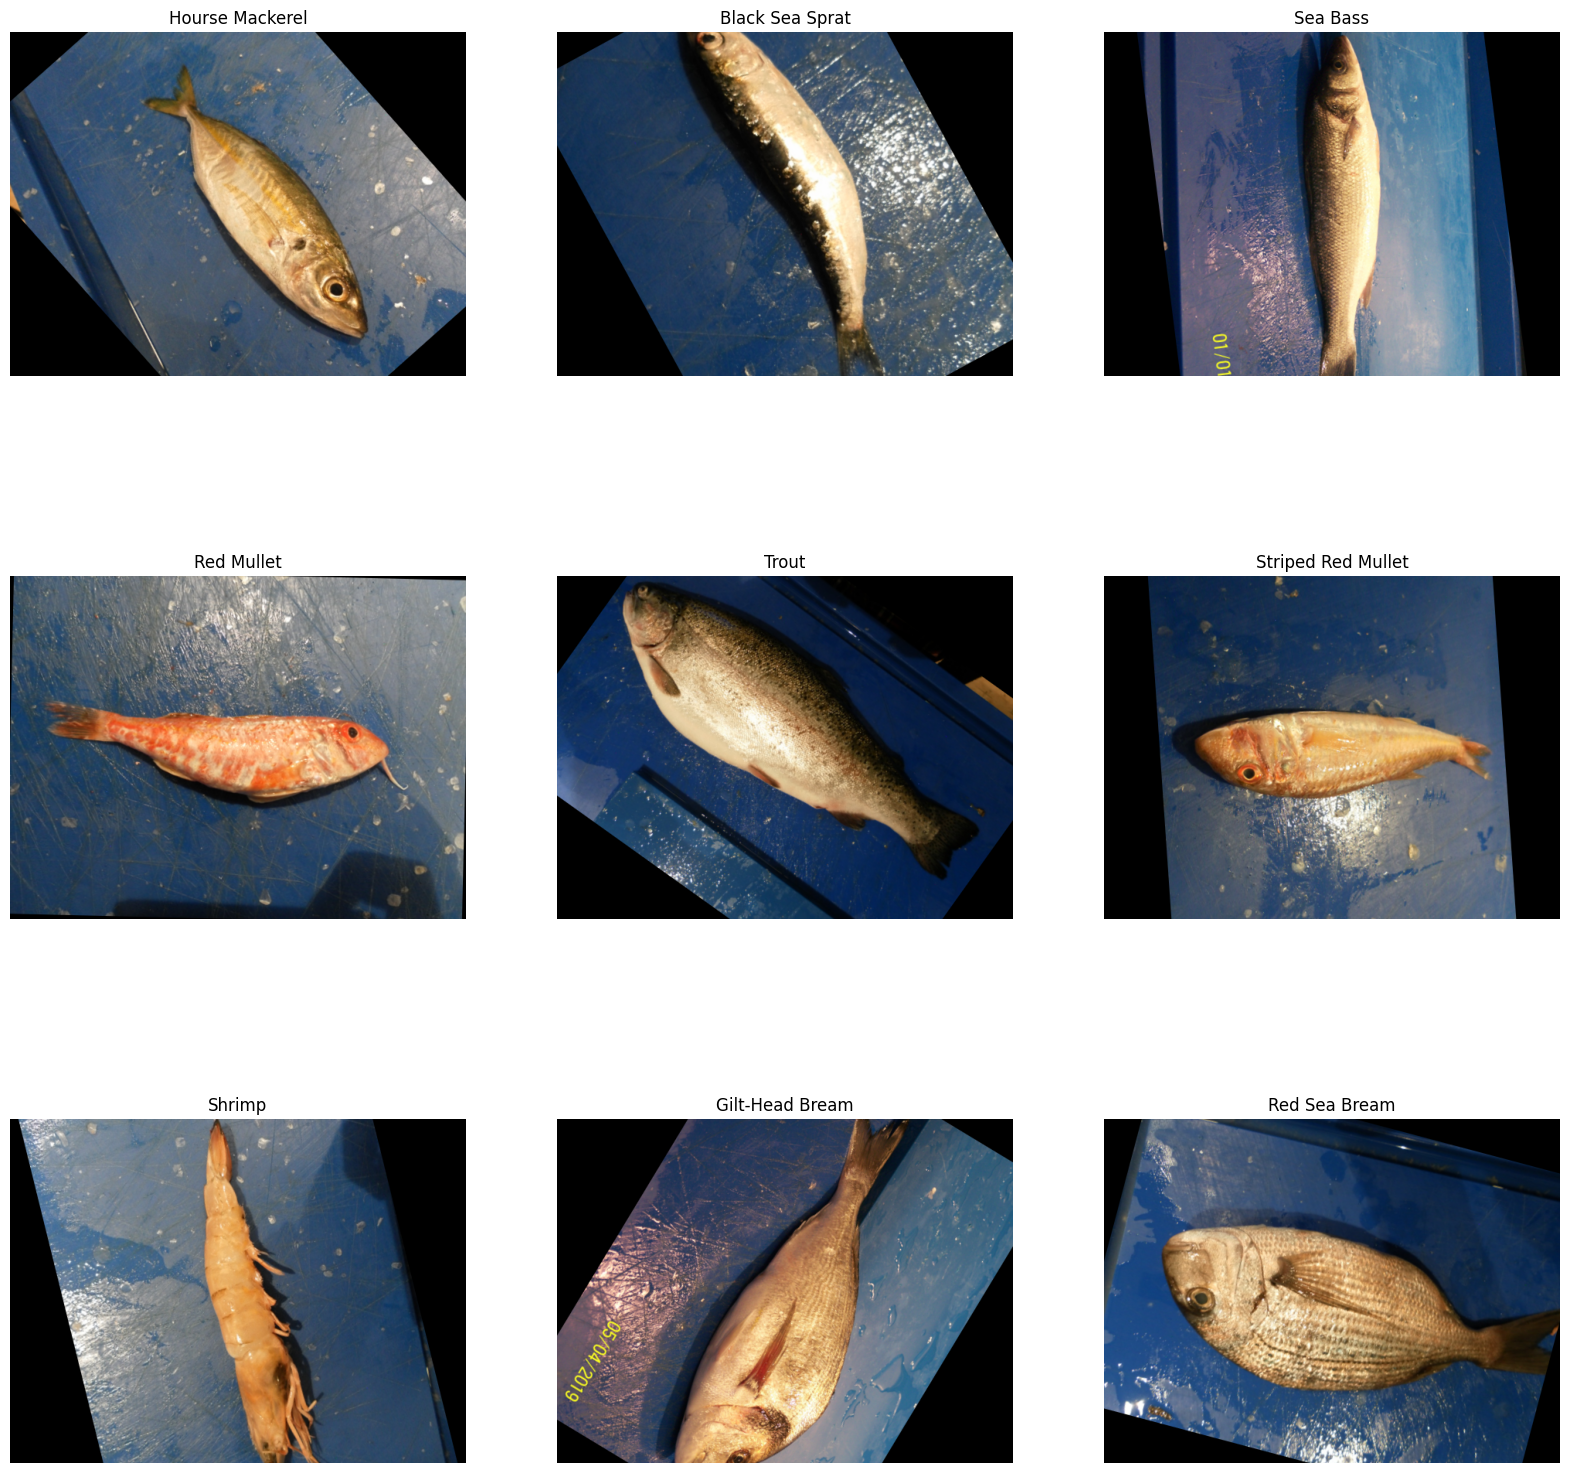

In [57]:
# Başlangıç değişkenini sıfırla
cn = 0

# Grafik boyutunu ayarla
plt.figure(figsize=(20, 20))

# Her benzersiz etiket için işlemleri gerçekleştir
for unique_label in data["label"].unique():
    plt.subplot(3, 3, cn + 1)
    plt.imshow(plt.imread(data[data["label"] == unique_label].iloc[0, 0]))
    plt.title(unique_label)
    plt.axis("off")
    cn += 1

# Grafiği göster
plt.show()

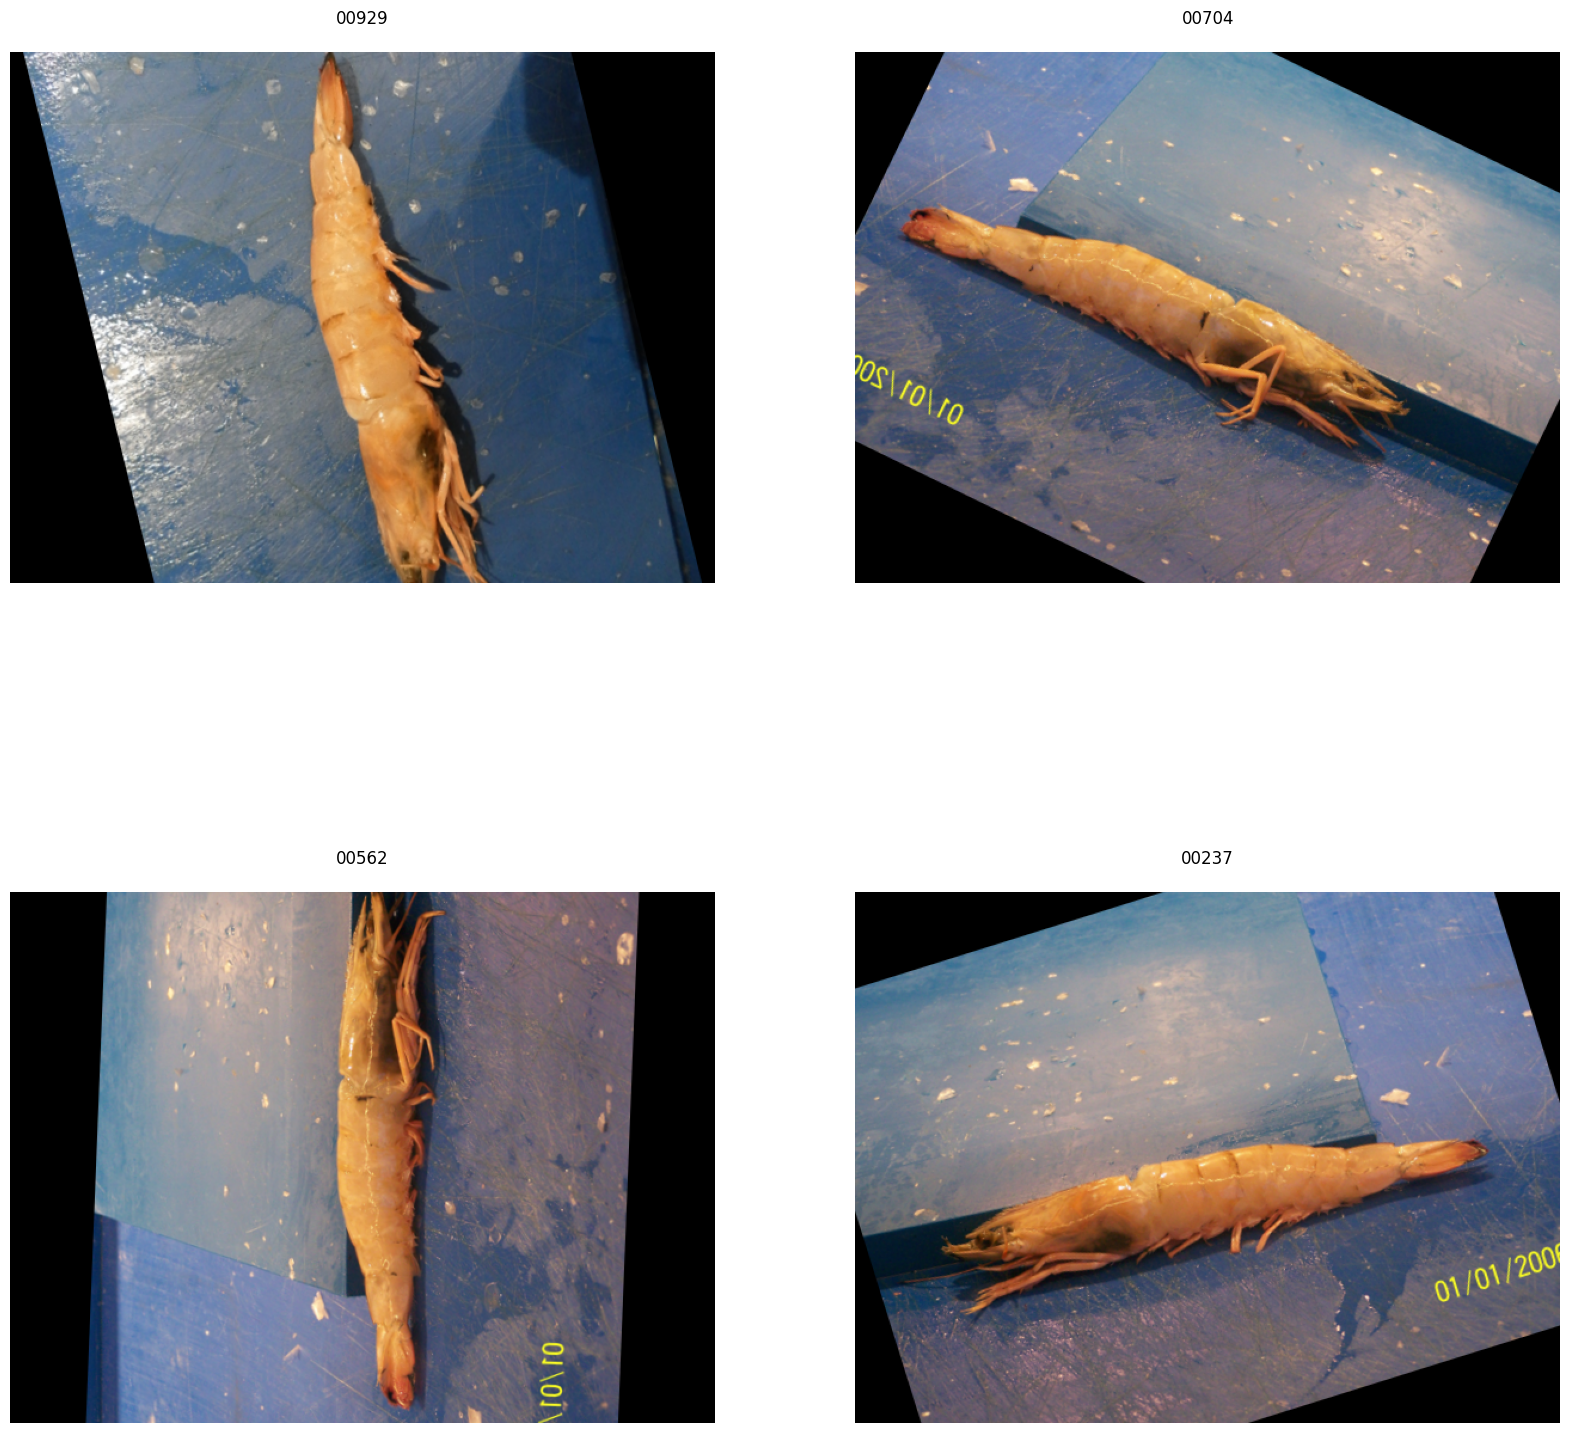

In [58]:
# Karides görüntülerini filtrele ve ilk 4 görüntüyü al
shrimps = data[data['label'] == 'Shrimp'].path.iloc[0:4]

# Grafik boyutunu ayarla
plt.figure(figsize=(20, 20))

# Alt grafik düzenini ayarla
cn = 0
for shrimp in shrimps:
    # Alt grafiği oluştur
    plt.subplot(int(np.sqrt(len(shrimps))), int(np.sqrt(len(shrimps))), cn + 1)
    plt.imshow(plt.imread(shrimp))  # Görüntüyü oku ve göster
    plt.title(shrimp[-9:-4], pad=20)  # Dosya adından türü başlık olarak ekle, pad ile üstteki boşluğu artır
    plt.axis('off')  # Eksenleri kapat
    cn += 1  # Sayaç artır

# Grafiği göster
plt.show()

In [59]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array